# Shakespeare Text Generation (using RNN LSTM)

In this study, we aim to generate text that resembles Shakespeare's writing style through the use of a Recurrent Neural Network (RNN) that operates on a character-based level. The source material for this experiment is drawn from the Shakespeare dataset featured in the blog post [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). The implementation will be done using Tensorflow v2 and its Keras API.

_Inspired by [Text generation with an RNN](https://www.tensorflow.org/tutorials/text/text_generation)_
and [Kaggle_Notebook](https://www.kaggle.com/code/aashkatrivedi/shakespeare-text-generation)

## Importing Libraries

This code imports TensorFlow, Matplotlib, and NumPy libraries and prints the Python version, TensorFlow version, and Keras version installed in the current environment. It also prints the platform (operating system) and current time, but those statements are commented out.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import time
import pathlib
import os

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.13
Tensorflow version: 2.11.0
Keras version: 2.11.0


## Downloading the Dataset

This code downloads a text file containing the complete works of William Shakespeare from a URL specified in dataset_file_origin. The file is downloaded to a directory specified in cache_dir, and the path to the downloaded file is printed. The get_file function from the TensorFlow Keras module is used to download the file and ensure that it is only downloaded once. The file is downloaded with the name shakespeare.txt and its absolute path is determined using the pathlib library.





In [2]:
cache_dir = './tmp'
dataset_file_name = 'shakespeare.txt'
dataset_file_origin = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'

dataset_file_path = tf.keras.utils.get_file(
    fname=dataset_file_name,
    origin=dataset_file_origin,
    cache_dir=pathlib.Path(cache_dir).absolute()
)

print(dataset_file_path)

1115394/1115394 [==============================] - 0s 0us/step
C:\Users\varun\Downloads\tmp\datasets\shakespeare.txt


## Analyzing the Dataset

This code reads the Shakespeare text file that was previously downloaded and prints the number of characters in the text using the len function. The text file is opened in read mode using the built-in open function and its contents are stored in the text variable. The length of text is then printed using the format method to insert the value of len(text) into the string.

In [3]:
# Reading the database file.
text = open(dataset_file_path, mode='r').read()

print('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


### Own Exploration- This code prints the first 300 characters in the Shakespeare text file stored in the text variable using array slicing. The [:300] notation indicates that the first 300 characters of text should be returned.





In [4]:
# Let's take a look at the first 300 characters in text.
print(text[:300])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us


### Own Exploration - This code finds the unique characters in the Shakespeare text file and prints the number of unique characters and the list of unique characters sorted in alphabetical order. The set function is used to create a set of unique characters from the text variable. The sorted function is then used to sort the set into a list in alphabetical order and assign it to the vocab variable. The number of unique characters is printed using the format method to insert the length of vocab into the string. The vocab list is also printed.

In [5]:
# The unique characters in the file
vocab = sorted(set(text))

print('{} unique characters'.format(len(vocab)))
print('vocab:', vocab)

65 unique characters
vocab: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


# Processing the dataset

##Text Vectorization

Before feeding the text to our RNN we need to convert the text from a sequence of characters to a sequence of numbers. To do so we will detect all unique characters in the text, form a vocabulary out of it and replace each character with its index in the vocabulary.

### Own Exploration - This code creates a dictionary char2index that maps each character in the vocab list to its index in the list. The dictionary is created using a dictionary comprehension, where the keys are the characters and the values are the indices. The code then prints the first 20 key-value pairs of the char2index dictionary using a loop and the zip function. The loop iterates over the first 20 keys in the dictionary and prints each key-value pair using the format method. The repr function is used to obtain a string representation of the character that is safe to use in Python code, even if it contains special characters like quotes. Finally, the code prints an ellipsis to indicate that there are more key-value pairs in the dictionary.

In [6]:
# Map characters to their indices in vocabulary.
char2index = {char: index for index, char in enumerate(vocab)}

print('{')
for char, _ in zip(char2index, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2index[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


### Own Exploration - This code creates an array index2char that maps the indices of characters in the vocab list to the characters themselves. The np.array function from NumPy is used to create the array, and the vocab list is passed as the argument. The resulting array has the same length as the vocab list, and the value at each index of the array is the character corresponding to that index in the vocab list. The array is printed to the console.

In [7]:
# Map character indices to characters from vacabulary.
index2char = np.array(vocab)
print(index2char)

['\n' ' ' '!' '$' '&' "'" ',' '-' '.' '3' ':' ';' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


### Own Exploration- This code converts the characters in the text variable to their corresponding indices in the char2index dictionary and stores the resulting indices in a NumPy array text_as_int. The conversion is done using a list comprehension, where the char2index dictionary is used to look up the index of each character in the text variable. The resulting list is passed to the np.array function to create a NumPy array. The length of the text_as_int array is printed using the format method to insert the length of the array into the string. The first 15 characters of the original text and their corresponding indices in the text_as_int array are also printed using the format method and the repr function.

In [8]:
# Convert chars in text to indices.
text_as_int = np.array([char2index[char] for char in text])

print('text_as_int length: {}'.format(len(text_as_int)))
print('{} --> {}'.format(repr(text[:15]), repr(text_as_int[:15])))

text_as_int length: 1115394
'First Citizen:\n' --> array([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0])


# Create Training Sequences

This code sets the maximum length of a sentence in characters to sequence_length and calculates the number of examples that will be generated in a single epoch of training data. The number of examples is calculated by dividing the length of the text variable by sequence_length + 1. The + 1 is added to account for the label that is shifted by one character from the input sequence. The result is printed to the console.

In [9]:
# The maximum length sentence we want for a single input in characters.
sequence_length = 100
examples_per_epoch = len(text) // (sequence_length + 1)

print('examples_per_epoch:', examples_per_epoch)

examples_per_epoch: 11043


This code creates a tf.data.Dataset object char_dataset from the text_as_int NumPy array. The from_tensor_slices method is used to create a dataset where each element is a single character index from the text_as_int array. The code then iterates over the first 5 elements of the dataset and prints the corresponding characters using the index2char array to look up the characters. The take method is used to extract the first 5 elements of the dataset.

In [10]:
# Create training dataset.
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for char in char_dataset.take(5):
    print(index2char[char.numpy()])

F
i
r
s
t


This code creates a new dataset sequences where each element is a sequence of characters with length sequence_length + 1 (accounting for the label). The batch method is used to create the sequences, with the drop_remainder=True parameter indicating that any remaining elements that don't fit evenly into a sequence should be dropped. The length of the sequences dataset is printed using the as_numpy_iterator method, which converts the dataset to a NumPy array and returns an iterator over the elements. The first 5 sequences in the dataset are printed using a for loop that iterates over the sequences dataset and prints each sequence using the index2char array to look up the corresponding characters. The join method is used to concatenate the characters in each sequence into a single string. The repr function is used to ensure that any special characters (like line breaks) are printed as escape sequences.

In [11]:
# Generate batched sequences out of the char_dataset.
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

# Sequences size is the same as examples_per_epoch.
print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
print()

# Sequences examples.
for item in sequences.take(5):
    print(repr(''.join(index2char[item.numpy()])))

Sequences count: 11043

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


This comment describes the shape of the sequences dataset. The dataset contains 11,043 sequences, where each sequence has a length of 101 characters (100 characters for the input and 1 character for the label). The comment provides a visual representation of the shape of the dataset as a list of tuples, where each tuple contains a sequence of 101 characters. The entire dataset is represented as a list of these tuples, with a length of 11,043.

In [12]:
# sequences shape:
# - 11043 sequences
# - Each sequence of length 101
#
#
#    101     101          101
# [(.....) (.....) ...  (.....)]
#
# <---------- 11043 ----------->

For each sequence, duplicate and shift it to form the input and target text. For example, say `sequence_length` is `4` and our text is `Hello`. The input sequence would be `Hell`, and the target sequence `ello`.

### Own Exploration- This function takes a sequence of indices as input and returns a tuple (input_text, target_text) where input_text is the sequence of indices with the last element removed, and target_text is the same sequence of indices with the first element removed. In other words, input_text is the sequence of indices that will be fed as input to the model, and target_text is the sequence of indices that the model is trying to predict. The function can be used to convert the sequences in the sequences dataset into input-target pairs that can be used to train the language model.

In [13]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

### Own Exploratrion - This code applies the split_input_target function to each element of the sequences dataset using the map method, to create a new dataset dataset where each element is a tuple of two sequences: the input sequence and the target sequence. The size of the dataset is the same as the sequences dataset, which is equal to examples_per_epoch. The input and target sequences have a length of sequence_length, which is one less than the length of the sequences in the sequences dataset. The as_numpy_iterator() method is used to iterate over the dataset and convert it to a list.

In [14]:
dataset = sequences.map(split_input_target)

# Dataset size is the same as examples_per_epoch.
# But each element of a sequence is now has length of `sequence_length`
# and not `sequence_length + 1`.
print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

dataset size: 11043


### Own Exploration - This code selects the first example from the dataset, using the take(1) method, and prints the size of the input and target sequences. It also prints the input and target sequences, using the join method to convert the sequences of indices to sequences of characters.

The input sequence has length sequence_length, which is the same as the length of the input_example sequence, and the target sequence has the same length. The input sequence is the first 100 characters of the text, and the target sequence is the same as the input sequence, but shifted one character to the right. The goal of the language model will be to predict the next character in the target sequence, given the input sequence.

In [15]:
for input_example, target_example in dataset.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:', repr(''.join(index2char[input_example.numpy()])))
    print('Target:', repr(''.join(index2char[target_example.numpy()])))

Input sequence size: 100
Target sequence size: 100

Input: 'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


This comment provides a description of the shape of the dataset object.

The dataset object has examples_per_epoch sequences, each of length sequence_length. Each element of the dataset object is a tuple of two sub-sequences of length sequence_length: input_text and target_text.

input_text contains the first 100 characters of each sequence, and target_text contains the last 100 characters of each sequence.

This format allows us to train a language model that takes as input a sequence of length sequence_length, and outputs a probability distribution over the vocabulary for the next character in the sequence.

In [16]:
# dataset shape:
# - 11043 sequences
# - Each sequence is a tuple of 2 sub-sequences of length 100 (input_text and target_text)
#
#
#    100       100           100
# /(.....)\ /(.....)\ ... /(.....)\  <-- input_text
# \(.....)/ \(.....)/     \(.....)/  <-- target_text
#
# <----------- 11043 ------------->

Each index of these vectors are processed as one time step. For the input at time step 0, the model receives the index for "F" and trys to predict the index for "i" as the next character. At the next timestep, it does the same thing but the RNN considers the previous step context in addition to the current input character.

### Own Exploration - This code is just showing the first 5 steps of the first sequence in the dataset. For each step, it prints the input index, which corresponds to a character in the input sequence, and the expected output index, which corresponds to the next character in the target sequence. It also prints the actual character corresponding to each index.

In [17]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print('Step {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(index2char[target_idx])))

Step  0
  input: 18 ('F')
  expected output: 47 ('i')
Step  1
  input: 47 ('i')
  expected output: 56 ('r')
Step  2
  input: 56 ('r')
  expected output: 57 ('s')
Step  3
  input: 57 ('s')
  expected output: 58 ('t')
Step  4
  input: 58 ('t')
  expected output: 1 (' ')


## Splitting training sequences into batches

We used `tf.data` to split the text into manageable sequences. But before feeding this data into the model, we need to shuffle the data and pack it into batches.

This creates a TensorFlow dataset that is shuffled and batched, using the parameters BUFFER_SIZE and BATCH_SIZE to control the size of the shuffle buffer and the size of the batches. The drop_remainder argument is set to True, which means that any incomplete batches at the end of the dataset will be dropped.

In [18]:
# Batch size.
BATCH_SIZE = 64

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int32, name=None), TensorSpec(shape=(64, 100), dtype=tf.int32, name=None))>

The input_text and target_text tensors contain sequences of characters, where each character is represented by an integer. The first batch of input sequences is a 64x100 tensor, where 64 is the batch size and 100 is the sequence length. The target_text tensor is identical to the input_text tensor except that each element is shifted one index to the right.

In [19]:
for input_text, target_text in dataset.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[53 52 43 ... 41 47 58]
 [47 57  1 ... 45 57  1]
 [ 6  1 63 ... 41 43  1]
 ...
 [ 0 32 46 ... 43 57 58]
 [52 41 43 ... 53  1 19]
 [57 41 43 ... 52 42  1]], shape=(64, 100), dtype=int32)

1st batch: target_text: tf.Tensor(
[[52 43 10 ... 47 58 47]
 [57  1 45 ... 57  1 57]
 [ 1 63 53 ... 43  1 47]
 ...
 [32 46 53 ... 57 58  6]
 [41 43  6 ...  1 19 53]
 [41 43 54 ... 42  1 50]], shape=(64, 100), dtype=int32)


The code is processing text data to train a character-level language model using TensorFlow.

It begins by loading a text corpus and creating a vocabulary of characters used in the corpus. The characters in the corpus are then converted to numerical indices that correspond to their positions in the vocabulary. Next, the text is divided into sequences of fixed length (100 in this case), and these sequences are used to create a training dataset. Each sequence is split into two parts: the first part is used as the input to the model, and the second part is used as the target that the model should predict. Finally, the data is batched and shuffled to create a training dataset that can be used to train the language model.

In [20]:
# dataset shape:
# - 172 batches
# - 64 sequences per batch
# - Each sequence is a tuple of 2 sub-sequences of length 100 (input_text and target_text)
#
#
#     100       100           100             100       100           100
# |/(.....)\ /(.....)\ ... /(.....)\| ... |/(.....)\ /(.....)\ ... /(.....)\|  <-- input_text
# |\(.....)/ \(.....)/     \(.....)/| ... |\(.....)/ \(.....)/     \(.....)/|  <-- target_text
#
# <------------- 64 ---------------->     <------------- 64 ---------------->
#
# <--------------------------------- 172 ----------------------------------->

## Build the model

Use [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to define the model. For this simple example three layers are used to define our model:

- [tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding): The input layer. A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions;
- [tf.keras.layers.LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM): A type of RNN with size units=rnn_units (You can also use a GRU layer here.)
- [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): The output layer, with vocab_size outputs.

In [21]:
# Let's do a quick detour and see how Embeding layer works.
# It takes several char indices sequences (batch) as an input.
# It encodes every character of every sequence to a vector of tmp_embeding_size length.
tmp_vocab_size = 10
tmp_embeding_size = 5
tmp_input_length = 8
tmp_batch_size = 2

tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embeding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)

print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

1/1 [==============================] - 0s 67ms/step
tmp_input_array shape: (2, 8)
tmp_input_array:
[[8 0 4 0 1 5 3 2]
 [1 9 8 4 8 3 2 2]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[ 0.02616686  0.03458718  0.04411212  0.00989461  0.01564747]
  [ 0.00553139 -0.04481349  0.04246651  0.00104336 -0.02476038]
  [-0.03420416  0.0273389   0.00014647  0.0045799  -0.02062111]
  [ 0.00553139 -0.04481349  0.04246651  0.00104336 -0.02476038]
  [ 0.01248703 -0.00867982  0.00561149  0.03468699 -0.00750459]
  [ 0.02547472 -0.03056592 -0.03166564 -0.00810779 -0.04666475]
  [ 0.00074784  0.02251151 -0.04139213 -0.02150704 -0.01593578]
  [ 0.0319855   0.01490427 -0.04178299 -0.03205196 -0.04446663]]

 [[ 0.01248703 -0.00867982  0.00561149  0.03468699 -0.00750459]
  [-0.01804072  0.00212531 -0.04117199 -0.02517644  0.04818705]
  [ 0.02616686  0.03458718  0.04411212  0.00989461  0.01564747]
  [-0.03420416  0.0273389   0.00014647  0.0045799  -0.02062111]
  [ 0.02616686  0.03458718  0.04411212 

### Own Exploration - We will use a simple architecture consisting of an Embedding layer, followed by a LSTM layer, and a Dense layer with vocab_size output units to predict the probability distribution over the next character in the sequence. The Embedding layer maps each character to a vector of embedding_dim dimensions, which is learned during training. The LSTM layer processes the sequence of input embeddings, and the output of the LSTM is passed through the Dense layer to produce the probability distribution over the vocabulary.

We will train the model to minimize the cross-entropy loss between the predicted and true probability distributions over the vocabulary. During training, we will use teacher forcing, where the input to the LSTM at each time step is the true target character at the previous time step, rather than the predicted character.

In [22]:
# Length of the vocabulary in chars.
vocab_size = len(vocab)

# The embedding dimension.
embedding_dim = 256

# Number of RNN units.
rnn_units = 1024

This function builds and returns a Keras model with three layers:

1. An Embedding layer that takes integer-encoded vocabulary indices and turns them into dense vectors of fixed size.
2. An LSTM layer with rnn_units number of units. This layer processes the input sequences and produces output sequences of the same length.
3. A Dense layer that maps the output sequences of the LSTM layer to a probability distribution over the vocabulary.

In [23]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
  
    return model

The model is now defined with the architecture we specified using the build_model function, and can be further compiled and trained.

In [24]:
model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           16640     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 65)            66625     
                                                                 
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


To get actual predictions from the model we need to sample from the output distribution, to get actual character indices. This distribution is defined by the logits over the character vocabulary.

## Try the model

The output shape of the model on a batch of input examples is (batch_size, sequence_length, vocab_size). This means that for each sequence in the batch, the model outputs a vector of probabilities for each character in the vocabulary. The batch_size and sequence_length dimensions correspond to the input sequences in the batch. The vocab_size dimension corresponds to the probability distribution over the vocabulary for each input sequence.

In [30]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


To get actual predictions from the model we need to sample from the output distribution, to get actual character indices. This distribution is defined by the logits over the character vocabulary.

The example_batch_predictions tensor contains predictions for each step of the sequence, for each sequence in the batch. The shape of the tensor is (batch_size, sequence_length, vocab_size).

So, example_batch_predictions[0, 0] is the prediction of the model for the first character of the first sequence in the batch. It is a vector of size vocab_size, representing the probability distribution over the vocabulary for this character.

In [31]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[ 1.2368873e-03  4.9343780e-03 -5.8752312e-03 -4.7560653e-04
  3.0634673e-03  4.3385196e-05 -2.7023735e-03 -1.9164273e-03
 -3.7364969e-03 -3.7354586e-04  1.7429364e-03 -2.5310314e-03
 -3.6916151e-03 -5.4574152e-03 -3.5941799e-03 -3.3951791e-03
  2.6757554e-03 -4.7201272e-03 -3.1726656e-03  3.0335097e-03
 -5.4603415e-03 -4.1199426e-04 -2.5574279e-03 -2.5612814e-03
  1.4487673e-03  4.5793541e-04 -9.4073848e-04  2.3000021e-03
  5.4469756e-03  4.0158904e-03  1.1975446e-03  2.0692854e-03
  6.5231426e-03 -2.6291418e-03  4.5868242e-03 -4.0359520e-03
 -7.0128404e-03 -1.5679910e-03  7.0456997e-03 -3.5346572e-03
  3.3441803e-03  4.4654096e-03  2.0483318e-03  2.1035396e-03
 -5.0911899e-03 -1.0357515e-03  2.5092871e-03 -2.3523911e-03
 -5.1094475e-03 -6.4994809e-03  3.0526691e-03 -7.4863178e-04
  1.9131664e-03 -5.1045017e-03 -3.7387223e-03 -7.7903247e-04
  1.6829667e-03  2.5114915e-03 -6.7370210e-04  1.4942887e-03
 -1.9098228e-03 -

The tf.random.categorical() function generates random samples from a categorical distribution. It takes in a logits tensor which contains unnormalized log probabilities for each class, and returns a tensor of shape [batch_size, num_samples] where each element is an integer corresponding to the index of the chosen class. In the example shown, tmp_samples is a 1D tensor of length 5, with each element representing a random sample from the categorical distribution defined by the logits [-0.95, 0, 0.95]. The distribution is such that the class with index 2 has the highest probability of being chosen, followed by class 1 and then class 0.

In [32]:
# Quick overview of how tf.random.categorical() works.

# logits is 2-D Tensor with shape [batch_size, num_classes].
# Each slice [i, :] represents the unnormalized log-probabilities for all classes.
# In the example below we say that the probability for class "0" is low but the
# probability for class "2" is much higher.
tmp_logits = [
  [-0.95, 0, 0.95],
];

# Let's generate 5 samples. Each sample is a class index. Class probabilities 
# are being taken into account (we expect to see more samples of class "2").
tmp_samples = tf.random.categorical(
    logits=tmp_logits,
    num_samples=5
)

print(tmp_samples)

tf.Tensor([[1 2 2 1 1]], shape=(1, 5), dtype=int64)


The shape of sampled_indices is (100, 1). This means that num_samples is 1, so sampled_indices contains a single sample for each of the 100 time steps in the sequence. The values of sampled_indices are integers between 0 and the size of the vocabulary minus 1, which represent the predicted character indices for each time step.

In [33]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices.shape

TensorShape([100, 1])

squeeze() function removes dimensions of size 1 from the shape of a tensor. Here, we removed the dimension of size 1 from sampled_indices which was introduced by the tf.random.categorical() function. We then convert the resulting tensor to a numpy array to inspect its shape. Since sampled_indices is a 2D tensor, its shape should be (batch_size, sequence_length) where batch_size is the number of sequences in a batch, and sequence_length is the length of each sequence.

In [34]:
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(100,)

This is an array of integer values that represent the predicted index of the next character in the sequence, as sampled from the output probability distribution of the model. Each integer value corresponds to a character in the vocabulary.

In [35]:
sampled_indices

array([48, 12, 22, 33,  4, 32, 45,  0, 28, 46, 10, 58, 15, 55, 55,  4,  2,
       61,  8, 14, 34, 12, 22, 47, 20, 28, 61, 55, 51, 12,  0, 49, 23, 41,
       19, 11, 22,  4, 39, 40, 35, 20,  2, 28,  8,  7, 16, 22, 43, 28, 13,
       19, 49, 11, 27, 42,  3, 21, 12, 48, 59, 13, 53,  1,  5, 24, 36,  0,
       39, 32, 56, 26, 12, 30,  5, 38, 30,  7, 21, 42, 58, 35,  3,  4, 22,
       31, 21, 35,  1,  8, 57, 37, 47, 40, 61, 60, 15, 11, 34,  9])

The code above displays the input sequence and the predicted next character for that sequence, obtained by sampling from the model's output probability distribution.

For the input sequence, it concatenates the characters by joining their corresponding string representations from the index2char mapping.

The predicted next character is obtained by selecting the character index with the highest probability from the predicted probability distribution output by the model. The character is then converted back to its string representation using the index2char mapping, and all the predicted characters are concatenated to form the predicted output sequence.

In [36]:
print('Input:\n', repr(''.join(index2char[input_example_batch[0]])))
print()
print('Next char prediction:\n', repr(''.join(index2char[sampled_indices])))

Input:
 'o confess\nI loved him as in honour he required,\nWith such a kind of love as might become\nA lady like'

Next char prediction:
 "j?JU&Tg\nPh:tCqq&!w.BV?JiHPwqm?\nkKcG;J&abWH!P.-DJePAGk;Od$I?juAo 'LX\naTrN?R'ZR-IdtW$&JSIW .sYibwvC;V3"


This code calculates the loss for a batch of predictions generated by the model. The loss function is defined as sparse_categorical_crossentropy with from_logits=True, which means that it expects the model predictions to be in the form of unnormalized log probabilities (logits). The example_batch_loss tensor contains the calculated loss values for each sequence in the batch.

In [37]:
for i, (input_idx, sample_idx) in enumerate(zip(input_example_batch[0][:5], sampled_indices[:5])):
    print('Prediction {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  next predicted: {} ({:s})'.format(target_idx, repr(index2char[sample_idx])))

Prediction  0
  input: 53 ('o')
  next predicted: 1 ('j')
Prediction  1
  input: 1 (' ')
  next predicted: 1 ('?')
Prediction  2
  input: 41 ('c')
  next predicted: 1 ('J')
Prediction  3
  input: 53 ('o')
  next predicted: 1 ('U')
Prediction  4
  input: 52 ('n')
  next predicted: 1 ('&')


## Train the model

At this point the problem can be treated as a standard classification problem. Given the previous RNN state, and the input this time step, predict the class of the next character.

### Attach an optimizer, and a loss function

This code defines an objective function loss using sparse_categorical_crossentropy from the tf.keras.losses module. This function computes the cross-entropy loss between the true labels labels and the predicted logits probabilities.

The from_logits argument is set to True which indicates that the logits values are the output of a dense layer without applying softmax activation. This is because sparse_categorical_crossentropy internally applies softmax activation on the logits before calculating the loss, which leads to improved numerical stability.

In [38]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 65)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.1743093


This code compiles the model with the specified optimizer and loss function. Here, Adam optimizer is used with a learning rate of 0.001 and the loss function is defined as sparse_categorical_crossentropy. The model is now ready for training.

In [39]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

### Configure checkpoints

The code sets up a ModelCheckpoint callback that will save the model weights after each epoch. The filepath argument specifies the path and filename format for the saved weights, including the string {epoch} to insert the current epoch number. The save_weights_only argument indicates that only the model weights, not the entire model, should be saved.

In [40]:
# Directory where the checkpoints will be saved.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

### Execute the training

### Own Exploration - The EPOCHS variable is used to specify the number of epochs (iterations over the entire dataset) to train the model. In this case, the model will be trained for 100 epochs. The Source code was trained on 60 epochs. We tried to train the model on more epochs as training a neural network for too few epochs can lead to underfitting, whereas training for too many epochs can lead to overfitting. The optimal number of epochs will depend on the complexity of the problem, the size of the dataset, and the architecture of the model. Increasing the number of epochs can lead to better performance up to a certain point, but beyond that point, the model may start to overfit to the training data, resulting in poor performance on new, unseen data. Therefore, it is important to monitor the performance of the model on a validation set during training and stop training when the validation loss stops improving.

In [41]:
EPOCHS=100

The model.fit() function trains the model on the dataset for the given number of epochs using the specified optimizer and loss function. In this case, it uses the Adam optimizer and sparse categorical cross-entropy loss. The training is done in batches of size 64, which is specified in the BATCH_SIZE variable defined earlier.

The checkpoint_callback is passed as a callback to save the model weights after each epoch. These weights can be used later to restore the trained model.

The training progress and loss are logged in the history object.

In [42]:
history = model.fit(
  x=dataset,
  epochs=EPOCHS,
  callbacks=[
    checkpoint_callback
  ]
)

Epoch 1/100
172/172 [==============================] - 18s 74ms/step - loss: 2.6167
Epoch 2/100
172/172 [==============================] - 14s 68ms/step - loss: 1.9050
Epoch 3/100
172/172 [==============================] - 13s 69ms/step - loss: 1.6483
Epoch 4/100
172/172 [==============================] - 14s 70ms/step - loss: 1.5088
Epoch 5/100
172/172 [==============================] - 14s 69ms/step - loss: 1.4251
Epoch 6/100
172/172 [==============================] - 13s 68ms/step - loss: 1.3668
Epoch 7/100
172/172 [==============================] - 14s 69ms/step - loss: 1.3227
Epoch 8/100
172/172 [==============================] - 15s 71ms/step - loss: 1.2829
Epoch 9/100
172/172 [==============================] - 14s 71ms/step - loss: 1.2459
Epoch 10/100
172/172 [==============================] - 14s 69ms/step - loss: 1.2106
Epoch 11/100
172/172 [==============================] - 14s 69ms/step - loss: 1.1739
Epoch 12/100
172/172 [==============================] - 14s 70ms/step - lo

### Own Exploaration - This function takes the training history of a model (i.e., the output of the fit method) and plots the training loss across epochs using matplotlib. The plot has the following characteristics:

1. The x-axis represents the epochs.
2. The y-axis represents the loss value.
3. The plot title is "Loss".
4. The plot has a label for the training set.
5. The plot has a legend.
6. The plot has a grid with a dashed line style, a width of 1, and an opacity of 0.5.

In [43]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

### Own Exploaration - This function takes in the history object returned by model.fit() and generates a plot of the training loss over time (epochs). The function accesses the training loss values from the history object and plots them on a graph with labeled axes and a legend. Finally, it displays the plot.





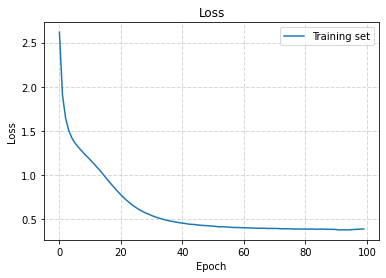

In [44]:
render_training_history(history)

## Generate text

### Restore the latest checkpoint

To keep this prediction step simple, use a batch size of 1.

Because of the way the RNN state is passed from timestep to timestep, the model only accepts a fixed batch size once built.

To run the model with a different `batch_size`, we need to rebuild the model and restore the weights from the checkpoint.

The tf.train.latest_checkpoint() function returns the path of the latest checkpoint file in a directory. In this case, it will return the path of the latest saved checkpoint in the checkpoint_dir directory.

In [45]:
tf.train.latest_checkpoint(checkpoint_dir)

'tmp/checkpoints/ckpt_100'

This code is loading the weights of the trained model from the latest checkpoint saved in the checkpoint_dir directory, and then building a new model with a batch_size of 1, so that we can generate text one character at a time. It's important to note that the weights of the trained model can only be loaded into a new model with the same architecture. Therefore, we first need to create a new model with the same architecture as the one that was trained, and then we can load the weights into it.

Also, the new model is built with a batch_size of 1 because when generating text, we want to provide the model with a single character at a time, and get the next predicted character. The model is then built with a dynamic sequence length, which means that it can handle input sequences of different lengths.

In [46]:
simplified_batch_size = 1

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([simplified_batch_size, None]))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (1, None, 256)            16640     
                                                                 
 lstm_1 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_1 (Dense)             (1, None, 65)             66625     
                                                                 
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


### The prediction loop

The following code block generates the text:

- It Starts by choosing a start string, initializing the RNN state and setting the number of characters to generate.

- Get the prediction distribution of the next character using the start string and the RNN state.

- Then, use a categorical distribution to calculate the index of the predicted character. Use this predicted character as our next input to the model.

- The RNN state returned by the model is fed back into the model so that it now has more context, instead than only one character. After predicting the next character, the modified RNN states are again fed back into the model, which is how it learns as it gets more context from the previously predicted characters.

This function generates text of length num_generate using the provided model and a starting string start_string. The function first converts the start_string to a sequence of input indices, initializes an empty string text_generated, and resets the state of the model. The model then predicts the next character using the input sequence and the previous hidden state.

The temperature parameter controls the degree of randomness in the output text. A lower temperature produces more predictable text, while a higher temperature produces more surprising text. The function uses the tf.random.categorical function to sample the predicted character based on the predicted probabilities, using a categorical distribution. The generated character is then added to the text_generated string, and the process is repeated until num_generate characters have been generated. Finally, the function returns the concatenation of the start_string and the generated text_generated string.

In [48]:
# num_generate
# - number of characters to generate.
#
# temperature
# - Low temperatures results in more predictable text.
# - Higher temperatures results in more surprising text.
# - Experiment to find the best setting.
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)

    # Converting our start string to numbers (vectorizing).
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(index2char[predicted_id])

    return (start_string + ''.join(text_generated))

The code generates text starting with the string "ROMEO: " using the trained model. It uses the generate_text() function and passes the model and the starting string to it as arguments. The default temperature is set to 1.0, which controls the "creativity" of the generated text. A higher temperature results in more unpredictable text, while a lower temperature results in more predictable text. The function generates 1000 characters of text and returns the generated string, which is then printed to the console.

In [49]:
# Generate the text with default temperature (1.0).
print(generate_text(model, start_string=u"ROMEO: "))

ROMEO: so perhaps he doth:
Alter, at the outward sighs;
My scrudle princess, help, heapsing war
In so most ignorance.

HENRY BOLINGBROKE:
To hear Phroches of this blood,
Nor never nursed in and like your foul reason
For raising EDWICK:
From off the gods know him and to make him answer
The noble duke hath been thishthy death,
But lusty, young wrinkled me.

ANGELO:
When I word to prove his head. Pray you, sit now at the least
Of Hermione a spirit true that I saw her and not vex'd.
With this, for we'll she kill to enter thee.

KING RICHARD II:
Thou hast sail tell me, is it possible
That lone! the king's King formal shuniefellows in a power; but I am still
As fearmen of boor comms!
Was ever man seeming with the mid-ain,
Saves his beauty tenderle at thes?
Halp heaven with her the main-courtier:
His looks are rilgs of richmon! O that resist
Are well foredue that I should not want,
In that impartive,
He was the tasses of heavenly here.

LEONTES:
His pranks she's not to do us,
If wealty thousa

This code generates text using the trained model with a given starting string "ROMEO: " and a temperature of 2.0. Setting a higher temperature leads to more diverse and unexpected results as the model is more likely to generate less probable next characters.

In [50]:
# Generate the text with higher temperature to get more unexpected results.
print(generate_text(model, start_string=u"ROMEO: ", temperature=2.0))

ROMEO: thither is in safegrace,
Your more stone with love to hear a traitor toum:
His sakes, I tender-brain'd revenge,
And lost alrains
thou shouldst have due mispure,
Were holder, flatter; and more razy, Quceemness an a belly?

WARWICK:
'scalistery
With disease, consubel! sees your joy!

Clown:
Out upon him, visits,--a lay; for nt,
His deady hath co-MISTER:
At the o. fishize!'

MENVIn
Of Clarence get you LAND:
Sands he:
And tell my knife, thou hasst cr by the T:
Once more, ovey it, draw
Thy burrencembunckingham gaver:
Even now ly powerful
For our cabler suddens.

DICHARD:
Bring me have:
It wanton Henry, pray, where's Gl as's huck we eater air
For irst up against it: but I dather
could fancing board repence,
She had been broke.
He usurpt living is to encounter.
Ah, tidings,
His ansare chifble.

Third Monta:
Come, my Katter with old command hate.
Hark! Provostevend metal, BOLIO:

Ritors dayly face, whom I, sort
thou her marks: you will not Cholicly veriend
Tybaltshion.
Brother, Are-brac

### Compiling the model

This code compiles the model with a loss function categorical_crossentropy, optimizer adam, and a single metric 'accuracy'. The compiled metrics can be viewed using the model.metrics property which returns a list of metric names.

In [51]:
# Compile the model with a loss function, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# View the list of compiled metrics
print(model.metrics)

[]


## Save the model

This code saves the trained model in the HDF5 file format with the name text_generation_shakespeare_rnn.h5. The save() function from the Keras API is used to save the model.

In [52]:
model_name = 'text_generation_shakespeare_rnn.h5'
model.save(model_name, save_format='h5')

### In Future Exploration - Converting the model to web-format
To use this model on the web we need to convert it into the format that will be understandable by tensorflowjs. To do so we may use tfjs-converter as following:

tensorflowjs_converter --input_format keras \
  ./experiments/text_generation_shakespeare_rnn/text_generation_shakespeare_rnn.h5 \
  ./demos/public/models/text_generation_shakespeare_rnn